### 01 - Fundamentals of Image Processing

During the course, we are going to use Python 3 and some basic libraries to load, save, show and process images. This notebook shows some python basics as well as the following libraries:

`numpy` numerical matemathics library, allows working with multidimensional arrays, includes optimised operators for vector and matrix

`imageio` is a input/output library for images

`matplotlib` is a plotting library for images and graphics


In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

OBS: when using `as` an alias is created to allow accessing the library using a shorter identifier. For example, `numpy` can be accessed via `np`.
So when creating a zero-valued array `A` with 10 elements we may use:

In [3]:
A = np.zeros(10)

In [4]:
print(A)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In order to capture input from the keyboard the function `input()` may be used. After getting the input, it is good to convert the value into the desired type, such as String, Integer, etc. Below, two image filenames are read from the keyboard, converting the values to strings.

Afterwards, the `imageio` library is used to read such files from the disk and load them into the memory


In [5]:
filename1 = str(input())
filename2 = str(input())

# reading image files
img1 = imageio.imread(filename1)
img2 = imageio.imread(filename2)

images/num1.png
images/num2.png


The objects `img1` and `img2` are arrays with a specific shape (dimensions) that can be checked using the attribute `shape` 

In [9]:
print(type(img1))
print(img1.shape)
print(img2.shape)


<class 'imageio.core.util.Array'>
(250, 250)
(250, 250)


In order to process such images, it is fundamental to know the dimensions of an image.

Let us now show the input images, using the `matplotlib` library


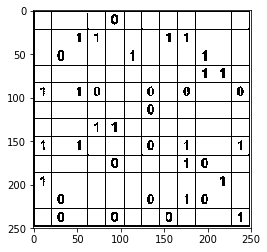

In [10]:
plt.imshow(img1, cmap="gray")

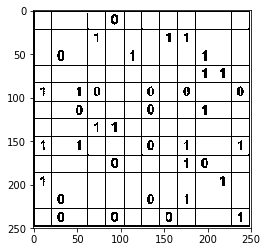

In [12]:
plt.imshow(img2, cmap="gray")

In this example we are going to detect the differences between the two images in order to find in which cells there are different numbers.

To do so, the simplest (but not fastest) way is to go through all pixels explicitly using two loops, and subtracting each pair of pixels.

The result of the subtraction is stored in a new matrix that is initialized with zeros. Note that, in order to allow subtracting the images pixel-by-pixel, we need to ensure both have the same dimensions.

In [14]:
size1 = img1.shape
size2 = img2.shape
assert size1 == size2

In [15]:
img_sub = np.zeros(size1, dtype=float)

for x in range(size1[0]):
    for y in range(size1[1]):
        img_sub[x,y] = float(img1[x,y]) - float(img2[x,y])

The resulting image can be shown with the `matplotlib`.

I will also going to show the colorbar for us to inspect which values were mapped to the different gray levels

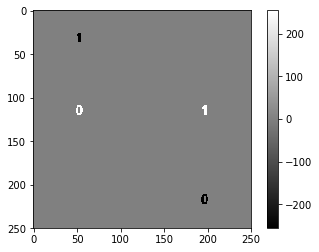

In [19]:
plt.imshow(img_sub, cmap="gray")
plt.colorbar()

Note the range of values goes from negative to positive values. Let's check exactly which are those values

In [21]:
print("Min value", np.min(img_sub))
print("Max value", np.max(img_sub))

Min value -255.0
Max value 255.0


This is no good since we wish to represent each pixel using 8 bits. To allow storing and displaying the image correctly, we must normalise the image to the range [0,255].

But now, instead of using loops, I am going to show that python allows processing matrices directly using arithmetic operators:

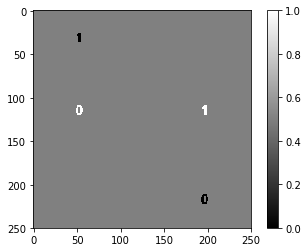

In [23]:
# get max and min values
imax = np.max(img_sub)
imin = np.min(img_sub)

# normalize the image so that min becomes 0 and max becomes 1
img_sub_norm = (img_sub-imin)/(imax-imin)

plt.imshow(img_sub_norm, cmap="gray")
plt.colorbar()

Note the colorbar changed. Now we can multiply the whole image with 255 and then convert to a 8 bit representation (unsigned int with 8 bits)

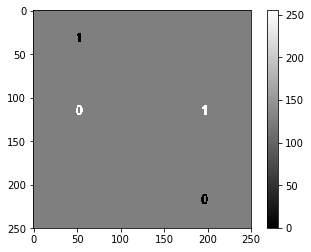

In [25]:
img_sub_norm = (img_sub_norm*255).astype(np.uint8)

plt.imshow(img_sub_norm, cmap="gray")
plt.colorbar()

Finally, we write the image in the disk using the `imageio` library:

In [26]:
imageio.imwrite("diff_nums.jpg", img_sub_norm)